In [1]:
# Imports 
import os
import sys
from io import StringIO
sys.path.append("..")
os.environ["pyna_language"] = 'julia'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline
from pyNA.pyna import pyna
from shapely.geometry import Polygon

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Inputs
x_lst = np.linspace(-5000, 15000, 161)
y_lst = np.hstack((np.linspace(0, 3000, 31)[:-1], np.linspace(3000, 6000, 16)))

In [3]:
# File names 
path_name = dict()
path_name['stca'] = dict()
path_name['stca']['STCB'] = dict()
path_name['stca']['STCB']['V2'] = dict()  
path_name['stca']['STCB']['V2']['std'] = 'trajectory_stca_' + str(np.round(750.0,3)) + '_' + str(np.round(0.75,3)) + '.csv'
path_name['stca']['STCB']['V2']['adv'] = 'trajectory_stca_' + str(np.round(50.,3)) + '_' + str(np.round(0.75,3)) + '.csv'
path_name['stca']['STCB']['Vmax']= dict()
path_name['stca']['STCB']['Vmax']['std'] = 'trajectory_stca_' + str(np.round(650.0,3)) + '_' + str(np.round(0.4,3)) + '.csv'
path_name['stca']['STCB']['Vmax']['adv'] = 'trajectory_stca_' + str(np.round(50.0,3)) + '_' + str(np.round(0.575,3)) + '.csv'
path_name['stca']['PTCB'] = dict()
path_name['stca']['PTCB']['V2']   = 'trajectory_stca_ptcb_V2.csv'
path_name['stca']['PTCB']['Vmax'] = 'trajectory_stca_ptcb_Vmax.csv'

path_name['a10'] = dict()
path_name['a10']['STCB'] = dict()
path_name['a10']['STCB']['V2'] = dict()  
path_name['a10']['STCB']['V2']['std'] = 'trajectory_a10_' + str(np.round(300.0,3)) + '_' + str(np.round(0.775,3)) + '.csv'
path_name['a10']['STCB']['V2']['adv'] = 'trajectory_a10_' + str(np.round(50.0,3)) + '_' + str(np.round(0.775,3)) + '.csv'
path_name['a10']['STCB']['Vmax']= dict()
path_name['a10']['STCB']['Vmax']['std'] = 'trajectory_a10_' + str(np.round(300.0,3)) + '_' + str(np.round(0.675,3)) + '.csv'
path_name['a10']['STCB']['Vmax']['adv'] = 'trajectory_a10_' + str(np.round(75.0,3)) + '_' + str(np.round(0.675,3)) + '.csv'
path_name['a10']['PTCB'] = dict()
path_name['a10']['PTCB']['V2']   = 'trajectory_a10_ptcb_V2.csv'
path_name['a10']['PTCB']['Vmax'] = 'trajectory_a10_ptcb_Vmax.csv'

engine_name = dict()
engine_name['stca'] = dict()
engine_name['stca']['STCB'] = dict()
engine_name['stca']['STCB']['V2'] = dict()  
engine_name['stca']['STCB']['V2']['std'] = 'engine_stca_' + str(np.round(750.0,3)) + '_' + str(np.round(0.75,3)) + '.csv'
engine_name['stca']['STCB']['V2']['adv'] = 'engine_stca_' + str(np.round(50.,3)) + '_' + str(np.round(0.75,3)) + '.csv'
engine_name['stca']['STCB']['Vmax']= dict()
engine_name['stca']['STCB']['Vmax']['std'] = 'engine_stca_' + str(np.round(650.0,3)) + '_' + str(np.round(0.4,3)) + '.csv'
engine_name['stca']['STCB']['Vmax']['adv'] = 'engine_stca_' + str(np.round(50.0,3)) + '_' + str(np.round(0.575,3)) + '.csv'
engine_name['stca']['PTCB'] = dict()
engine_name['stca']['PTCB']['V2']   = 'engine_stca_ptcb_V2.csv'
engine_name['stca']['PTCB']['Vmax'] = 'engine_stca_ptcb_Vmax.csv'

engine_name['a10'] = dict()
engine_name['a10']['STCB'] = dict()
engine_name['a10']['STCB']['V2'] = dict()  
engine_name['a10']['STCB']['V2']['std'] = 'engine_a10_' + str(np.round(300.0,3)) + '_' + str(np.round(0.775,3)) + '.csv'
engine_name['a10']['STCB']['V2']['adv'] = 'engine_a10_' + str(np.round(50.0,3)) + '_' + str(np.round(0.775,3)) + '.csv'
engine_name['a10']['STCB']['Vmax']= dict()
engine_name['a10']['STCB']['Vmax']['std'] = 'engine_a10_' + str(np.round(300.0,3)) + '_' + str(np.round(0.675,3)) + '.csv'
engine_name['a10']['STCB']['Vmax']['adv'] = 'engine_a10_' + str(np.round(75.0,3)) + '_' + str(np.round(0.675,3)) + '.csv'
engine_name['a10']['PTCB'] = dict()
engine_name['a10']['PTCB']['V2']   = 'engine_a10_ptcb_V2.csv'
engine_name['a10']['PTCB']['Vmax'] = 'engine_a10_ptcb_Vmax.csv'

In [5]:
# Compute noise contours
if False: 
    for ac_name in ['stca', 'a10']:
        for vnrs_case in ['STCB', 'PTCB']:
            for case in ['V2', 'Vmax']:

                if vnrs_case == 'STCB':

                    for selection in ['std', 'adv']:

                        print(ac_name + ', ' + vnrs_case + ', ' + case, ', ' + selection)

                        pyna_settings = pyna.load_settings(case_name=ac_name)
                        pyna_settings.ac_name = ac_name

                        pyna_settings.output_directory_name = vnrs_case + '/' + case

                        pyna_settings.trajectory_file_name = path_name[ac_name][vnrs_case][case][selection]
                        pyna_settings.engine_file_name = engine_name[ac_name][vnrs_case][case][selection]

                        pyna_settings.lateral_attenuation = True
                        pyna_settings.shielding = False
                        pyna_settings.all_sources = True
                        pyna_settings.levels_int_metric = 'epnl'
                        pyna_settings.observer_lst = ('contours',)

                        py = pyna(pyna_settings)
                        py.compute_noise_contours(x_lst=x_lst, y_lst=y_lst)

                        np.save('../cases/'+ac_name+'/output/' + pyna_settings.output_directory_name + '/contours/x_lst_'+selection+'.npy', py.noise.contour['x_lst'])
                        np.save('../cases/'+ac_name+'/output/' + pyna_settings.output_directory_name + '/contours/y_lst_'+selection+'.npy', py.noise.contour['y_lst'])
                        np.save('../cases/'+ac_name+'/output/' + pyna_settings.output_directory_name + '/contours/sel_'+selection+'.npy', py.noise.contour['epnl'])

                else:

                    print(ac_name + ', ' + vnrs_case + ', ' + case)

                    pyna_settings = pyna.load_settings(case_name=ac_name)
                    pyna_settings.ac_name = ac_name

                    pyna_settings.output_directory_name = vnrs_case + '/' + case

                    pyna_settings.trajectory_file_name = path_name[ac_name][vnrs_case][case]
                    pyna_settings.engine_file_name = engine_name[ac_name][vnrs_case][case]

                    pyna_settings.lateral_attenuation = True
                    pyna_settings.shielding = False
                    pyna_settings.all_sources = True
                    pyna_settings.levels_int_metric = 'epnl'
                    pyna_settings.observer_lst = ('contours',)

                    py = pyna(pyna_settings)
                    py.compute_noise_contours(x_lst=x_lst, y_lst=y_lst)

                    np.save('../cases/'+ac_name+'/output/' + pyna_settings.output_directory_name + '/contours/x_lst.npy', py.noise.contour['x_lst'])
                    np.save('../cases/'+ac_name+'/output/' + pyna_settings.output_directory_name + '/contours/y_lst.npy', py.noise.contour['y_lst'])
                    np.save('../cases/'+ac_name+'/output/' + pyna_settings.output_directory_name + '/contours/sel.npy', py.noise.contour['epnl'])

In [78]:
# Load solutions 
X_lst = np.load('../cases/stca/output/PTCB/V2/contours/x_lst.npy')
Y_lst = np.load('../cases/stca/output/PTCB/V2/contours/y_lst.npy')
epnl = dict()
sel = dict()
for ac_name in ['stca', 'a10']:
    
    epnl[ac_name] = dict()
    sel[ac_name] = dict()
    
    for case_name in ['V2', 'Vmax']:    
    
        epnl[ac_name][case_name] = dict()
        sel[ac_name][case_name] = dict()
    
        for t_name in ['std', 'adv', 'ptcb']:
    
            if t_name == 'std':
                epnl[ac_name][case_name][t_name] = np.load('../cases/'+ac_name+'/output/STCB/'+case_name+'/contours/epnl_'+t_name+'.npy')
                sel[ac_name][case_name][t_name] = np.load('../cases/'+ac_name+'/output/STCB/'+case_name+'/contours/sel_'+t_name+'.npy')
            elif t_name == 'adv':
                epnl[ac_name][case_name][t_name] = np.load('../cases/'+ac_name+'/output/STCB/'+case_name+'/contours/epnl_'+t_name+'.npy')
                sel[ac_name][case_name][t_name] = np.load('../cases/'+ac_name+'/output/STCB/'+case_name+'/contours/sel_'+t_name+'.npy')
            elif t_name == 'ptcb':
                epnl[ac_name][case_name][t_name] = np.load('../cases/'+ac_name+'/output/'+vnrs_case+'/'+case_name+'/contours/epnl.npy')
                sel[ac_name][case_name][t_name] = np.load('../cases/'+ac_name+'/output/'+vnrs_case+'/'+case_name+'/contours/sel.npy')
    

In [63]:
# Smooth central row
for ac_name in ['stca', 'a10']:
    for case_name in ['V2', 'Vmax']:    
        for t_name in ['std', 'adv', 'ptcb']:
            epnl[ac_name][case_name][t_name][45,:] = (epnl[ac_name][case_name][t_name][44,:]-epnl[ac_name][case_name][t_name][43,:])/(Y_lst[44]-Y_lst[43])*(Y_lst[45]-Y_lst[44])+epnl[ac_name][case_name][t_name][44,:]
            sel[ac_name][case_name][t_name][45,:] = (sel[ac_name][case_name][t_name][44,:]-sel[ac_name][case_name][t_name][43,:])/(Y_lst[44]-Y_lst[43])*(Y_lst[45]-Y_lst[44])+sel[ac_name][case_name][t_name][44,:]    

In [79]:
def plot_contours(ac_name, x_lst, y_lst, noise, level):

    fig = plt.figure(figsize=(18,4))
    plt.style.use('../utils/plot.mplstyle')
    gs = fig.add_gridspec(1,7)

    color_lst = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    linestyle_lst = ['-', '--']
    
    ax = fig.add_subplot(gs[:5])
    for i,case_name in enumerate(['V2', 'Vmax']):
        for j,t_name in enumerate(['std', 'adv', 'ptcb']):
        
            ax.contour(x_lst/1000, y_lst/1000, noise[case_name][t_name], levels=[level], linestyles=linestyle_lst[i], colors=color_lst[j])


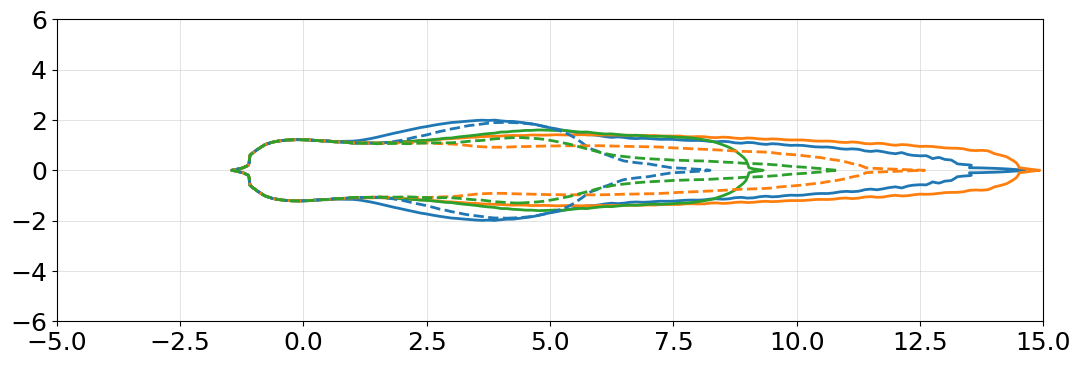

In [80]:
plot_contours('stca', X_lst, Y_lst, epnl['stca'], 80)

In [ ]:
    
    cntr = dict()
    cntr['STCB_V2_high'] = ax.contour(results['x_lst']/1000, results['y_lst']/1000, results['STCB']['V2_high'], levels=[85], colors='tab:blue')
    cntr['STCB_Vmax_high'] = ax.contour(results['x_lst']/1000, results['y_lst']/1000, results['STCB']['Vmax_high'], levels=[85], colors='tab:blue', linestyles='--')
    cntr['STCB_V2_low'] = ax.contour(results['x_lst']/1000, results['y_lst']/1000, results['STCB']['V2_low'], levels=[85], colors='tab:orange')
    cntr['STCB_Vmax_low'] = ax.contour(results['x_lst']/1000, results['y_lst']/1000, results['STCB']['Vmax_low'], levels=[85], colors='tab:orange', linestyles='--')
    cntr['PTCB_V2'] = ax.contour(results['x_lst']/1000, results['y_lst']/1000, results['PTCB']['V2'], levels=[85], colors='tab:green')
    cntr['PTCB_Vmax'] = ax.contour(results['x_lst']/1000, results['y_lst']/1000, results['PTCB']['Vmax'], levels=[85], colors='tab:green', linestyles='--')
    # ax.set_xlim([-4, 14])
    # ax.set_ylim([-2.7, 2.7])
    ax.plot([-4, 25], [0,0], 'k', linewidth=1)

    cntr['STCB_V2_high'].collections[0].set_label('STCB ($z_{cb} \geq 260m, V_2 + 20 kts$)')
    cntr['STCB_Vmax_high'].collections[0].set_label('STCB ($z_{cb} \geq 260m, 250 kts$)')
    cntr['STCB_V2_low'].collections[0].set_label('STCB ($z_{cb} < 260m, V_2 + 20 kts$)')
    cntr['STCB_Vmax_low'].collections[0].set_label('STCB ($z_{cb} < 260m, 250 kts$)')
    cntr['PTCB_V2'].collections[0].set_label('PTCB ($V_2$ + 20 kts)')
    cntr['PTCB_Vmax'].collections[0].set_label('PTCB (250 kts)')
    ax.legend(bbox_to_anchor=(0.97, 1.51), frameon=False, ncol=2)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('X [km]')
    ax.set_ylabel('Y [km]')

    # Compute contour areas
    area = dict()
    area['STCB_V2_high'] = Polygon(cntr['STCB_V2_high'].allsegs[0][0]).area
    area['STCB_Vmax_high'] = Polygon(cntr['STCB_Vmax_high'].allsegs[0][0]).area
    area['STCB_V2_low'] = Polygon(cntr['STCB_V2_low'].allsegs[0][0]).area
    area['STCB_Vmax_low'] = Polygon(cntr['STCB_Vmax_low'].allsegs[0][0]).area
    area['PTCB_V2'] = Polygon(cntr['PTCB_V2'].allsegs[0][0]).area
    area['PTCB_Vmax'] = Polygon(cntr['PTCB_Vmax'].allsegs[0][0]).area

    ax2 = fig.add_subplot(gs[5:])
    ax2.plot([-1,6], [0,0], 'k', linewidth=1)
    ax2.bar(0, area['STCB_V2_high']-area['STCB_V2_high'], color='tab:blue')
    ax2.bar(1, area['STCB_Vmax_high']-area['STCB_V2_high'], color='tab:blue', hatch='//')
    ax2.bar(2, area['STCB_V2_low']-area['STCB_V2_high'], color='tab:orange')
    ax2.bar(3, area['STCB_Vmax_low']-area['STCB_V2_high'], color='tab:orange', hatch='//')
    ax2.bar(4, area['PTCB_V2']-area['STCB_V2_high'], color='tab:green')
    ax2.bar(5, area['PTCB_Vmax']-area['STCB_V2_high'], color='tab:green', hatch='//')

    # ax2.xaxis.tick_top()
    ax2.set_xticks([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    ax2.set_xlim([-1, 6])
    # ax2.set_ylim(-7, 7.)
    # ax2.yaxis.tick_right()
    ax2.set_ylabel('$\Delta A_{noise}\ [km^2]$')


    ax2.fill_between([18,19], [8,8], [9,9], color='tab:blue', label='STCB ($z_{cb} \geq$ 260m)')
    ax2.fill_between([18,19], [8,8], [9,9], color='tab:orange', label='STCB ($z_{cb} <$ 260m)')
    ax2.fill_between([18,19], [8,8], [9,9], color='tab:green', label='PTCB')
    ax2.fill_between([18,19], [8,8], [9,9], facecolor='w', edgecolor="k", label='$V_{max}$ = $V_2$ + 20 kts', hatch='')
    ax2.fill_between([18,19], [8,8], [9,9], facecolor='w', edgecolor="k", label='$V_{max}$ = 250 kts', hatch='//')

    ax2.legend(loc='lower left', bbox_to_anchor=(0, 1.05), ncol=1, borderaxespad=0, frameon=False)

    plt.subplots_adjust(wspace=1.5)

    # plt.plot([0, 25], [0,0], linewidth=2, color='k')

    # plt.xlabel('X')
    # plt.ylabel('Y')

In [11]:
# Compute area 
def compute_contour_area(x_lst, y_lst, contours, level):

    ct = ax.contour(x_lst/1000, y_lst/1000, contours, levels=[level])
    
    return Polygon(ct.allsegs[0][0]).area

area = dict()
area['stca'] = dict()
area['stca']['STCB'] = dict()
area['stca']['STCB']['V2'] = dict() 
area['stca']['STCB']['V2']['std'] = compute_contour_area(x_lst, y_lst, area['stca']['STCB']['V2']['std'], level)
area['stca']['STCB']['V2']['adv'] = compute_contour_area(x_lst, y_lst, area['stca']['STCB']['V2']['adv'], level)
area['stca']['STCB']['Vmax']= dict()
area['stca']['STCB']['Vmax']['std'] = compute_contour_area(x_lst, y_lst, area['stca']['STCB']['Vmax']['std'], level)
area['stca']['STCB']['Vmax']['adv'] = compute_contour_area(x_lst, y_lst, area['stca']['STCB']['Vmax']['adv'], level)
area['stca']['PTCB'] = dict()
area['stca']['PTCB']['V2']   = compute_contour_area(x_lst, y_lst, area['stca']['PTCB']['V2']  , level)
area['stca']['PTCB']['Vmax'] = compute_contour_area(x_lst, y_lst, area['stca']['PTCB']['Vmax'], level)

area = dict()
area['a10'] = dict()
area['a10']['STCB'] = dict()
area['a10']['STCB']['V2'] = dict() 
area['a10']['STCB']['V2']['std'] = compute_contour_area(x_lst, y_lst, area['a10']['STCB']['V2']['std'], level)
area['a10']['STCB']['V2']['adv'] = compute_contour_area(x_lst, y_lst, area['a10']['STCB']['V2']['adv'], level)
area['a10']['STCB']['Vmax']= dict()
area['a10']['STCB']['Vmax']['std'] = compute_contour_area(x_lst, y_lst, area['a10']['STCB']['Vmax']['std'], level)
area['a10']['STCB']['Vmax']['adv'] = compute_contour_area(x_lst, y_lst, area['a10']['STCB']['Vmax']['adv'], level)
area['a10']['PTCB'] = dict()
area['a10']['PTCB']['V2']   = compute_contour_area(x_lst, y_lst, area['a10']['PTCB']['V2']  , level)
area['a10']['PTCB']['Vmax'] = compute_contour_area(x_lst, y_lst, area['a10']['PTCB']['Vmax'], level)    

KeyError: 'std'

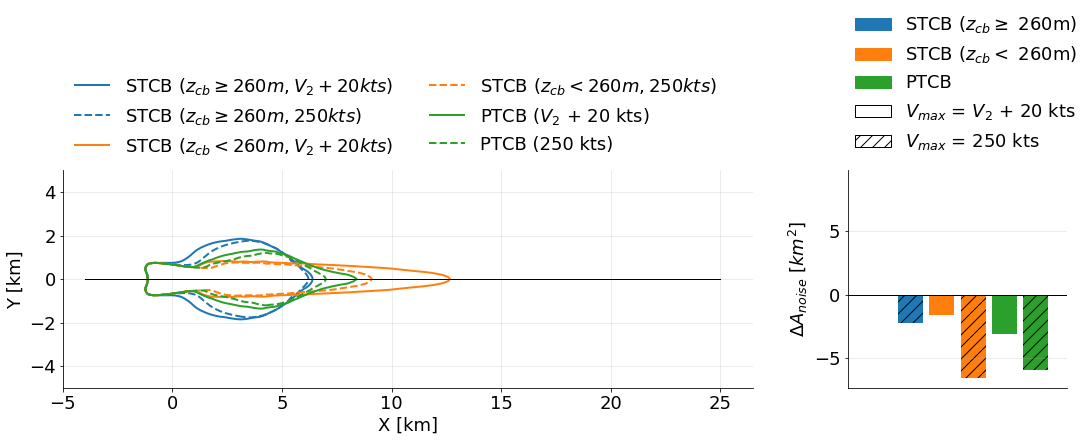

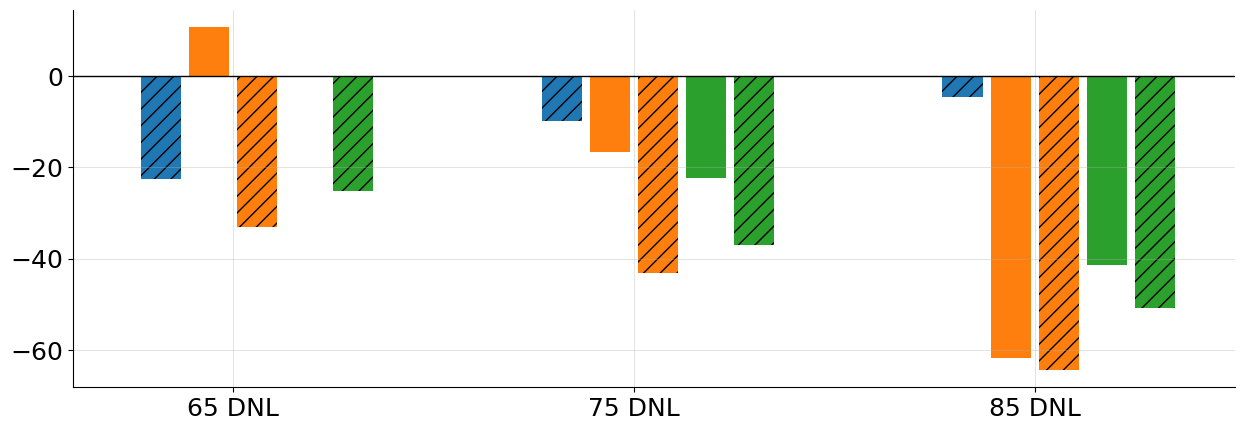

In [110]:
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(-0.3 + np.arange(3), rel_area['STCB_V2_high'], width=0.1, color='tab:blue')
ax.bar(-0.3 + np.arange(3)+1*0.12, rel_area['STCB_Vmax_high'], width=0.1, color='tab:blue', hatch='//')
ax.bar(-0.3 + np.arange(3)+2*0.12, rel_area['STCB_V2_low'], width=0.1, color='tab:orange')
ax.bar(-0.3 + np.arange(3)+3*0.12, rel_area['STCB_Vmax_low'], width=0.1, color='tab:orange', hatch='//')
ax.bar(-0.3 + np.arange(3)+4*0.12, rel_area['PTCB_V2'], width=0.1, color='tab:green')
ax.bar(-0.3 + np.arange(3)+5*0.12, rel_area['PTCB_Vmax'], width=0.1, color='tab:green', hatch='//')

ax.plot([-2, 4], [0, 0], 'k', linewidth=1)
ax.set_xlim([-0.4, 2.5])
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['65 DNL', '75 DNL', '85 DNL'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [41]:
(area['STCB_V2_high'][1] - area['STCB_V2_high'][0])/area['STCB_V2_high'][0]*100

0.0

In [42]:
area['STCB_V2_high']

array([71.41872806, 71.41872806, 71.41872806, 71.41872806])

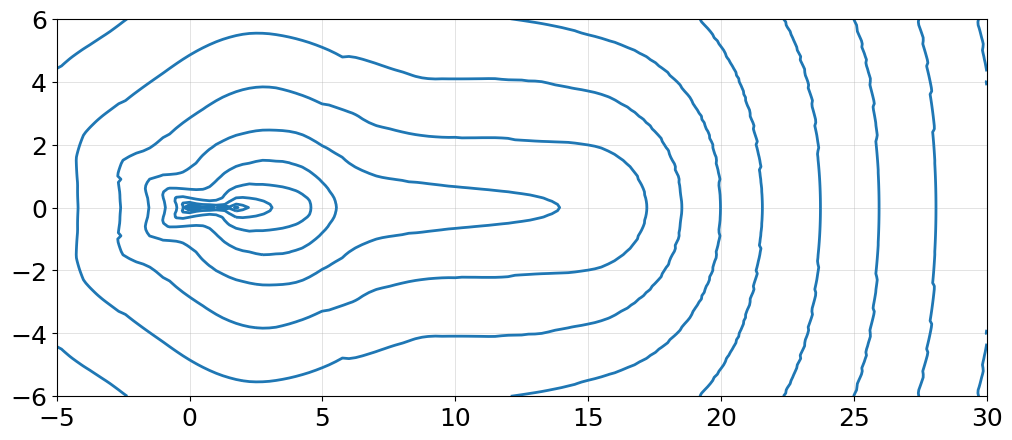

In [13]:

plt.contour(results['x_lst']/1000, results['y_lst']/1000, results['STCB']['V2_high'], levels=20, colors='tab:blue')
# cntr['STCB_Vmax_high'] = ax.contour(results['x_lst']/1000, results['y_lst']/1000, results['STCB']['Vmax_high'], levels=[85], colors='tab:blue', linestyles='--')
# cntr['STCB_V2_low'] = ax.contour(results['x_lst']/1000, results['y_lst']/1000, results['STCB']['V2_low'], levels=[85], colors='tab:orange')
# cntr['STCB_Vmax_low'] = ax.contour(results['x_lst']/1000, results['y_lst']/1000, results['STCB']['Vmax_low'], levels=[85], colors='tab:orange', linestyles='--')
# cntr['PTCB_V2'] = ax.contour(results['x_lst']/1000, results['y_lst']/1000, results['PTCB']['V2'], levels=[85], colors='tab:green')
# cntr['PTCB_Vmax'] = ax.contour(results['x_lst']/1000, results['y_lst']/1000, results['PTCB']['Vmax'], levels=[85], colors='tab:green', linestyles='--')

